## Haberman DataSet EDA

### Objective: 
Finding the factors for survival and survival possibility for new patient

In [95]:
import numpy as np
import seaborn as sbn
import pandas as pd
import matplotlib.pyplot as plt

haberman = pd.read_csv("haberman.csv")

In [8]:
print("Total Records: ",haberman.shape[0])

Total Records:  306


In [45]:
print("Available columns in the dataset:\n",list(haberman.columns))

Available columns in the dataset:
 ['age', 'year', 'nodes', 'status']


### Attribute Information

#### Attribute Information:-
* Age of patient at the time of operation (numerical)
* Patient's year of operation (year - 1900, numerical)
* Number of positive axillary nodes detected (numerical)
* Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 years

## Status

In [59]:
total = haberman["status"].count()
countStatusOne = haberman["status"][haberman["status"]==1].count()
countStatusTwo = total - countStatusOne

print("Patient's with Survival status 1: ",countStatusOne)
print("Patient's with Survival status 2: ",countStatusTwo)

print("Patient's with Survival status 1 in percentage: ",(countStatusOne/total)*100)
print("Patient's with Survival status 2 in percentage:",(countStatusTwo/total)*100)

Patient's with Survival status 1:  225
Patient's with Survival status 2:  81
Patient's with Survival status 1 in percentage:  73.52941176470588
Patient's with Survival status 2 in percentage: 26.47058823529412


## BOX PLOT and Whiskers

Box Plot for patient's age


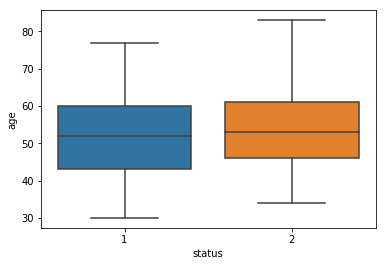

Box Plot for patient's year of operations


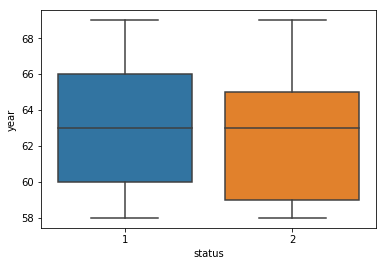

Box Plot for patient's positive axilllary nodes


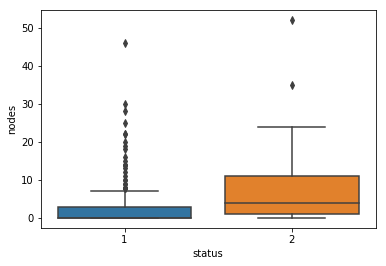

In [33]:
print("Box Plot for patient's age")
sbn.boxplot(x="status",y="age",data=haberman)
plt.show()

print("Box Plot for patient's year of operations")
sbn.boxplot(x="status",y="year",data=haberman)
plt.show()

print("Box Plot for patient's positive axilllary nodes")
sbn.boxplot(x="status",y="nodes",data=haberman)
plt.show()

## Violin Plot

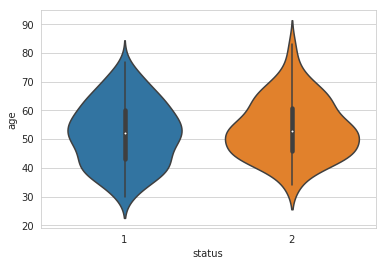

In [76]:
sbn.violinplot(x="status",y="age",data=haberman,size=8)
plt.show()

## CDF and PDF

[0.01134752 0.02269504 0.02647754 0.01985816 0.03498818 0.03498818
 0.01985816 0.02364066 0.01323877 0.00567376]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


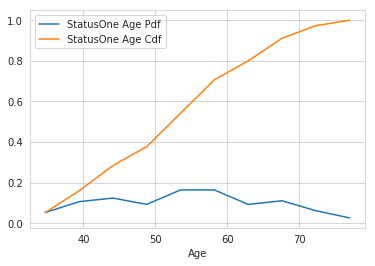

[0.00755858 0.02519526 0.04031242 0.04031242 0.02771479 0.02519526
 0.02015621 0.01007811 0.00503905 0.00251953]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


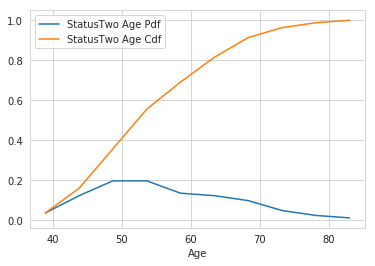

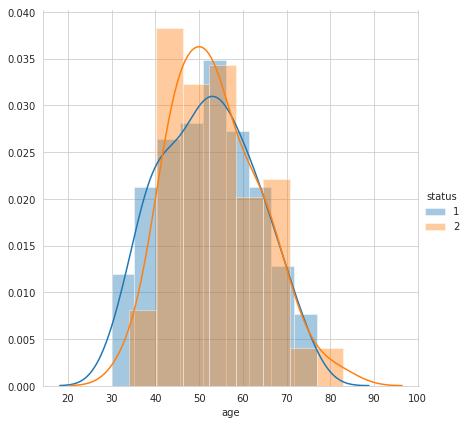

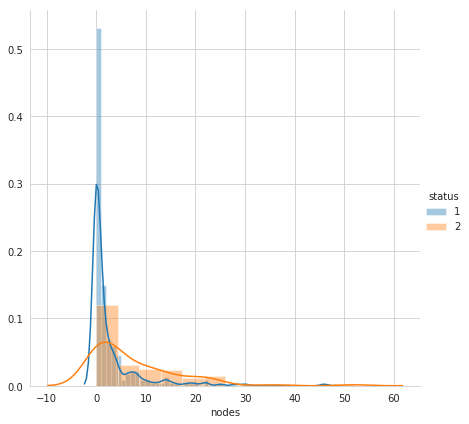

In [110]:
habermanStatusOne = haberman.loc[haberman["status"] == 1]
habermanStatusTwo = haberman.loc[haberman["status"] == 2]

counts, binEdges = np.histogram(habermanStatusOne['age'],bins=10,density=True)
print(counts)
print(binEdges)

pdf = counts/(sum(counts))


cdf = np.cumsum(pdf)
plt.plot(binEdges[1:],pdf,label="StatusOne Age Pdf")
plt.plot(binEdges[1:],cdf,label="StatusOne Age Cdf")
plt.xlabel("Age")
plt.legend()
plt.show()



counts, binEdges = np.histogram(habermanStatusTwo['age'],bins=10,density=True)
print(counts)
print(binEdges)

pdf = counts/(sum(counts))


cdf = np.cumsum(pdf)
plt.plot(binEdges[1:],pdf,label="StatusTwo Age Pdf")
plt.plot(binEdges[1:],cdf,label="StatusTwo Age Cdf")
plt.xlabel("Age")
plt.legend()
plt.show()


sbn.FacetGrid(haberman, hue="status",height=6).map(sbn.distplot,"age").add_legend()
plt.show()

sbn.FacetGrid(haberman, hue="status",height=6).map(sbn.distplot,"nodes").add_legend()
plt.show()

### Observations:

* No ground breaking observations from Violin and box plot. Oservations for status 1 and 2 are quite identical
* From the Distribution Plot
    * Patient survive 5 years or longer if age is below 35 
    * Patient died within 5 years if age is above 75

## Pair Plot

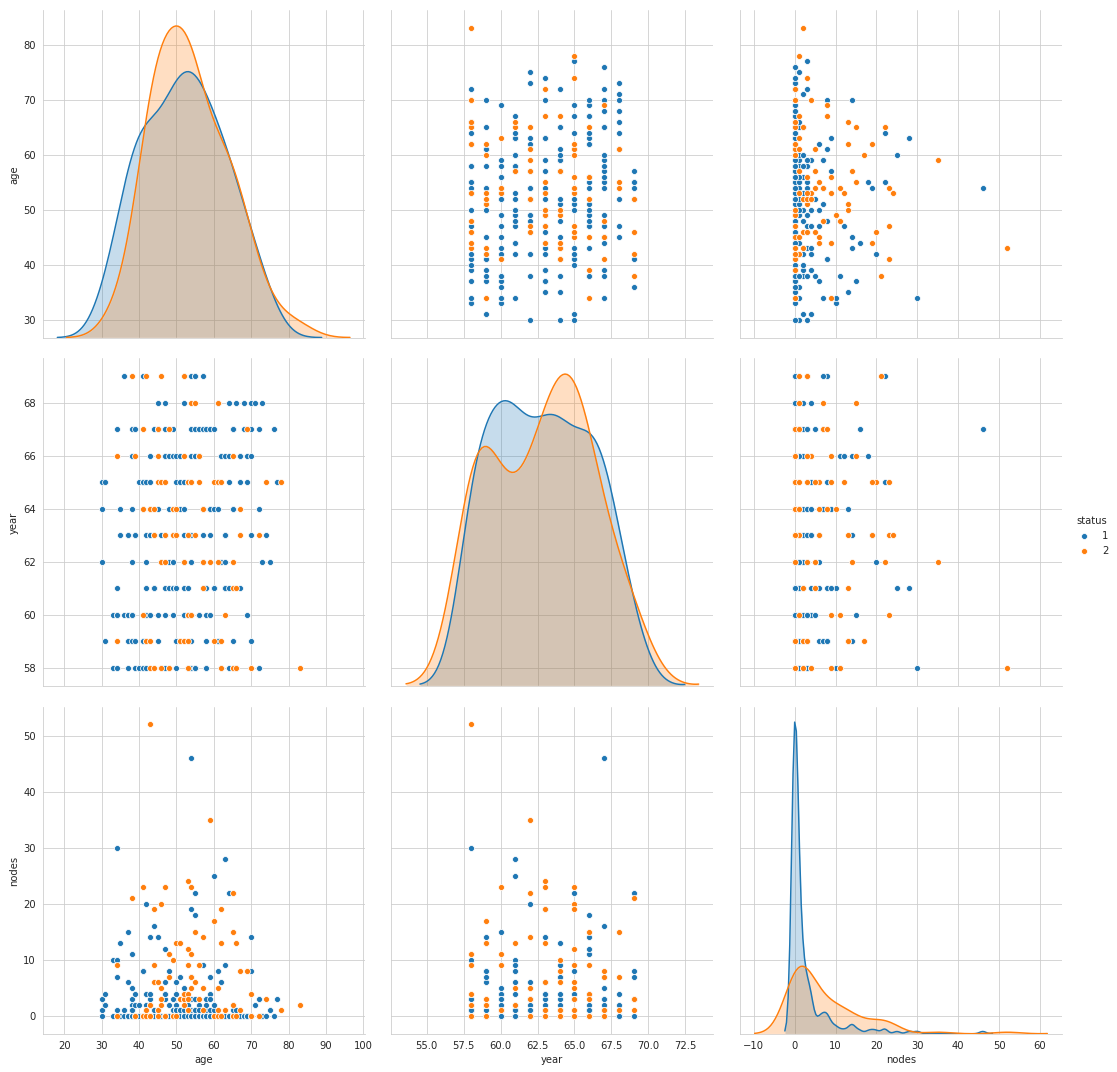

In [75]:
sbn.set_style("whitegrid")
sbn.pairplot(haberman,hue="status",vars=['age', 'year', 'nodes'],height=5)
plt.show()

### Observations:

* No ground breaking observations from Pair Plot. Difficult to scatter the survival rates


# Conclusion
 * The patient who survived 5 years or longer (225) are greater than patient who died within 5 years (81)
 * Patient survive 5 years or longer if age is below 35